In [1]:
from dataclasses import dataclass

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sympy import isprime

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set()

In [2]:
@dataclass
class Vec2:
    y: int
    x: int
    
    def __add__(self, other):
        return type(self)(y=self.y + other.y, x=self.x + other.x)
    
    def __iadd__(self, other):
        self.y += other.y
        self.x += other.x
        return self
    
    def __hash__(self):
        return hash((self.y, self.x))

In [3]:
is_prime_vec = np.vectorize(isprime)


def make_spiral(
    size: int, initial: Vec2, turn: dict[Vec2, Vec2]
) -> np.ndarray:
    """
    Make height x width spiral starting from center and following `initial` and `turn` instructions.
    """
    assert size % 2 == 1, "Size must be odd to construct a complete matrix."
    mat = np.zeros((size, size), dtype=int)
    
    pos = Vec2(size // 2, size // 2)
    delta = initial
    new_pos = None
    new_delta = None
    
    for idx in range(1, size ** 2 + 1):
        mat[pos.y, pos.x] = idx

        new_delta = initial if new_delta is None else turn[delta]
        new_pos = pos + new_delta
        
        # can turn
        if mat[new_pos.y, new_pos.x] == 0: 
            pos = new_pos
            delta = new_delta
        # should move forward
        else:
            pos += delta
                        
    return mat


def make_ulam(mat: np.ndarray) -> np.ndarray:
    n = len(mat)
    out = np.empty((*mat.shape, 3), dtype=int)
    
    mask = is_prime_vec(mat)
    out[np.where(mask)] = [0] * 3
    out[np.where(~mask)] = [255] * 3
                
    return out

In [4]:
N, S, W, E = map(lambda t: Vec2(*t), [(-1, 0), (1, 0), (0, -1), (0, 1)])
turn_left = {E: N, N: W, W: S, S: E}

s = make_spiral(201, initial=E, turn=turn_left)
u = make_ulam(s)

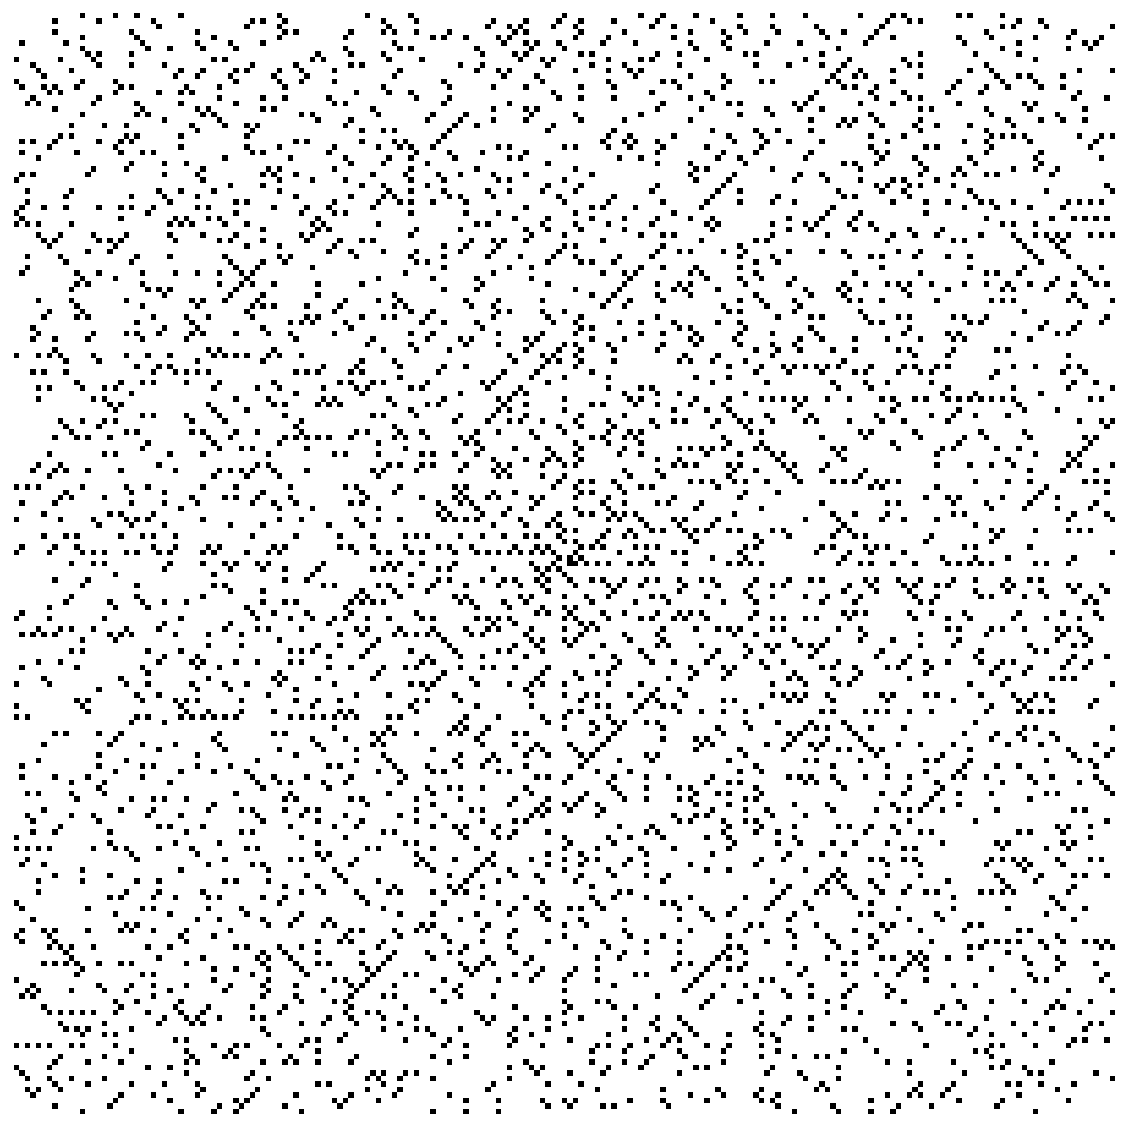

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(u)
plt.grid(False)
plt.axis('off')
plt.tight_layout()
plt.savefig('/home/alex/Downloads/ulam.png', dpi=300)
pass